In [7]:
#For computing the cost function
def costfunction(x1, y1, theta):
    m = float(x1.shape[0])
    cost = (1./(2.*m))*(x1*theta-y1).T*(x1*theta-y1)
    return cost.flat[0]

In [8]:
#The Gradient descent function
def gradient(x1, y1, theta, iter, alpha):
    theta_iter = [] #record theta for each iteration
    cost_iter = []  #record cost for each iteration
    m = float(x1.shape[0])
    for i in range(1,iter):
        #update theta
        theta = theta-(alpha/m)*x1.T*(x1*theta-y1)
        theta_iter.append(theta)
        cost_iter.append(costfunction(x1,y1,theta))
        return(theta, theta_iter, cost_iter)

In [9]:
#All Import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
%matplotlib inline

In [10]:
#Defining Data as Dataframe. Defining as Lists won't work.
d={'X' : [0,1,2,3,4], 'Y' : [1,3,7,13,21]}
df=pd.DataFrame(d)
print(df)

   X   Y
0  0   1
1  1   3
2  2   7
3  3  13
4  4  21


In [11]:
#Getting the X and Y datasets from the Dataframe
x1 = df.X[:, np.newaxis]
y1 = df.Y[:, np.newaxis]

In [12]:
#Performing Closed form Linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#Printing the variables of Regression Analysis
print('Coefficients: \n', lm.coef_)
print("Residual sum of squares: %.2f" % np.mean((lm.predict(x1) - y1) ** 2))
print('Variance score: %.2f' % lm.score(x1, y1))

Coefficients: 
 [[ 5.]]
Residual sum of squares: 2.80
Variance score: 0.95


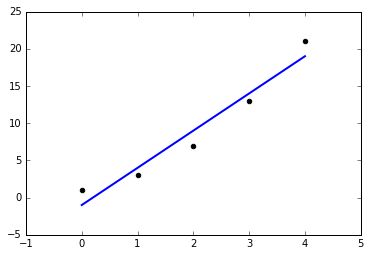

In [14]:
#Plot Raw data and the Closed form regression Line
plt.scatter(x1, y1,  color='black')
plt.plot(x1, lm.predict(x1), color='blue',linewidth=2)

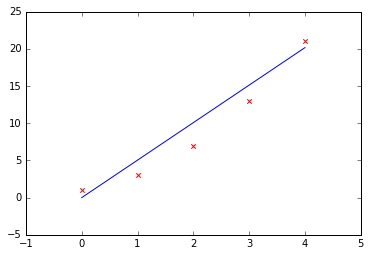

In [15]:
#Getting the X and Y datasets from the Dataframe
x1 = df.X[:, np.newaxis]
y1 = df.Y[:, np.newaxis]
theta = np.matrix([[0]])
alpha = 0.18#Learning Rate
iter = 3000#No. of Iterations
#Calling the gradient descent function
theta, theta_iter, cost_iter = gradient(x1, y1, theta, iter, alpha)
result = x1*theta
plt.plot(x1, result)
plt.scatter(x1, y1, marker='x', c='r')